[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/regression/gradient_descent.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# Gradient descent

We create a simple linear model using [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) (GD) as the optimizer. Remember, GD is an appropriate optimization algorithm to compute the parameters of a linear regression model when the dataset has a large number of instances. scikit-learn provides [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) (Stochastic Gradient Descent) for this purpose. 

In [6]:
# make sure the required packages are installed
%pip install numpy pandas scikit-learn matplotlib seaborn --quiet

repo='data-science-course'
module='regression'
# if running in colab, install the required packages and copy the necessary files
if get_ipython().__class__.__module__.startswith('google.colab'):
    import os
    if not os.path.exists(repo):
        !git clone --filter=blob:none --sparse https://github.com/francisco-ortin/data-science-course.git  2>/dev/null
        !cd {repo} && git sparse-checkout init --cone && git sparse-checkout set {module}  2>/dev/null
    !cp --update {repo}/{module}/*.py . 2>/dev/null
    !mkdir -p img data
    !mv {repo}/{module}/img/* img/.  2>/dev/null
    !mv {repo}/{module}/data/* data/.  2>/dev/null

# import the required modules
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import utils

ramdom_state = 42

Note: you may need to restart the kernel to use updated packages.


## Data preparation

We use the Statistics Online Computational Resource (SOCR) dataset for human heights (inches) and weight (pounds). We will try to predict the height from the weight.

First values X_train:
         Height
23311  67.94897
23623  66.55460
1020   70.05212
12645  68.48066
1533   66.11208
3518   68.28892
483    67.98093
19370  67.86923
12667  69.33609
7403   67.03314
First values y_train:
23311    110.6746
23623    127.0069
1020     140.2298
12645    133.0611
1533     115.4493
3518     139.8538
483      131.7363
19370    111.0826
12667    133.7583
7403     100.0056
Name: Weight, dtype: float64


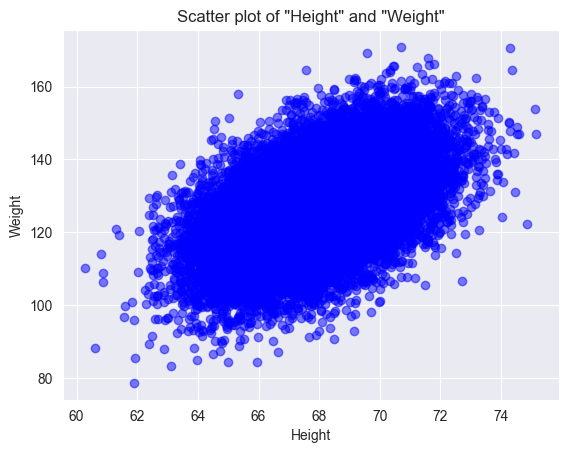

In [7]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = utils.load_dataset_from_csv('data/height_weight.csv',
                            ['Height'],'Weight', 0.2, random_state=ramdom_state)
# Let's print some data
print("First values X_train:", X_train.head(10), sep='\n')
print("First values y_train:", y_train.head(10), sep='\n')

# Visualize the data
utils.plot_values(X_train, y_train, 'Height', 'Weight')

## Model creation and evaluation with linear regression using OLS

We first create a linear regression model using [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS). We train and evaluate it with the MSE and R-squared metrics.

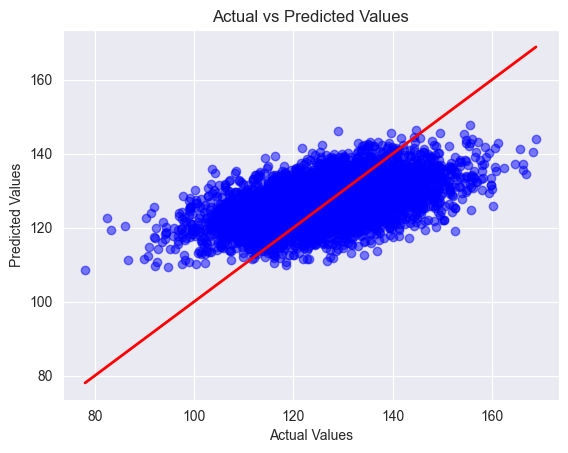

LinearRegression: Mean Squared Error (MSE) for the test set: 102.4879
LinearRegression: R-squared determination coefficient: 0.2606.


In [8]:
# We first create, train and evaluate a LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict the values for the test set
y_pred = model.predict(X_test)
utils.plot_actual_vs_predicted_values(y_test, y_pred)
# Shows MSE and R-square for the test set, and the model parameters
mse = mean_squared_error(y_test, y_pred)
print(f'LinearRegression: Mean Squared Error (MSE) for the test set: {mse:.4f}')
print(f"LinearRegression: R-squared determination coefficient: {r2_score(y_test, y_pred):.4f}.")

## Model creation and evaluation with linear regression using (Stochastic) Gradient Descent

Now, we perform the same training and evaluation process, using the Gradient Descent optimizer. We will use the [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) class from scikit-learn.

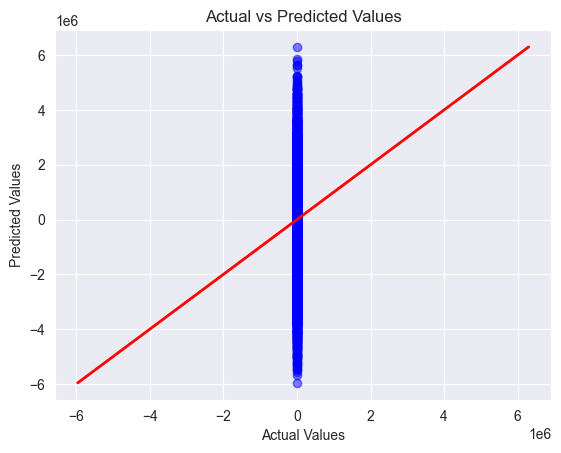

SGDRegression: Mean Squared Error (MSE) for the test set: 3392225478611.5186
SGDRegression: R-squared determination coefficient: -24473536432.5975.


In [9]:
# Create and train the LinearRegression model
model = SGDRegressor(random_state=ramdom_state, max_iter=10_000)  # max_iter is the number of epochs (iterations with the whole dataset)
model.fit(X_train, y_train)
# Predict the values for the test set
y_pred = model.predict(X_test)
utils.plot_actual_vs_predicted_values(y_test, y_pred)
# Shows MSE and R-square for the test set, and the model parameters
mse = mean_squared_error(y_test, y_pred)
print(f'SGDRegression: Mean Squared Error (MSE) for the test set: {mse:.4f}')
print(f"SGDRegression: R-squared determination coefficient: {r2_score(y_test, y_pred):.4f}.")

## ✨ Questions ✨
1. Why do you think SGD is behaving much worse than OLS with the same data? Try to fix it.
*Note*: This is an important point that occurs in most neural networks.

### Answers 

*Write your answers here.*


## ✨ Solution ✨

In [10]:
# Write your code here.
